In [0]:
from google.colab import drive

In [2]:
drive.mount("./gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [0]:
!unzip -q "./gdrive/My Drive/Colab Notebooks/DL/Copy of A_05_Part_02_Dataset.zip"

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy


In [5]:
%ls

A_05_Part_02_Dataset/  gdrive/  sample_data/


In [0]:
dirc= "A_05_Part_02_Dataset/"


In [0]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])

#pass transform here-in
train_data = datasets.ImageFolder(dirc+'Train/', transform=train_transforms)
val_data = datasets.ImageFolder(dirc+'Validation/', transform=test_transforms)

#data loaders
#batch size is 32 so that it can be run on both models with overloading memory of GPU

trainloader = torch.utils.data.DataLoader(train_data, batch_size=16,  shuffle=True)
valLoader = torch.utils.data.DataLoader(val_data, batch_size=16,  shuffle=True)


#test_data = datasets.ImageFolder(dirc+'Test/', transform=test_transforms)
#testloader = torch.utils.data.DataLoader(test_data, batch_size=8,  shuffle=True)



In [8]:
print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['covid-19', 'normal', 'pneumonia']


In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])



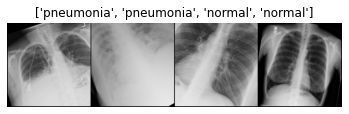

In [0]:
# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs[:4], classes[:4])

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
from tqdm.notebook import tqdm
import pickle
from sklearn.preprocessing import OneHotEncoder

In [11]:
from sklearn.preprocessing import OneHotEncoder
for_enc = np.array([0,1,2]).reshape(-1,1)
enc = OneHotEncoder()
enc.fit(for_enc)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [0]:
ys = enc.transform(classes.numpy().reshape(-1,1)).toarray()
ys

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [0]:
print(classes)
for ind,ten in enumerate(classes):
    if ten.item() == 0 :
        print(ind, 0)
        ys[ind] = [1,0,1]
        

tensor([2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 2])


In [0]:
ys

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [0]:
import pickle

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
def take_sig(outputs):
    sig = nn.Sigmoid()
    with torch.no_grad():
        o = sig(outputs)
        on1s = torch.ones(o.size()).to(device)
        zer0s = torch.zeros(o.size()).to(device)
        b = torch.where(o>0.5, on1s,zer0s)
    return b

In [0]:
def model_training(trainLoader, valdLoader, model, directory, modelName, Epochs=5, momentum=0.9,lr=0.001, criteria=nn.BCEWithLogitsLoss(),acc_loss_dic=None):


    #if you have gpu then you need to convert the network and data to cuda
    #the easiest way is to first check for device and then convert network and data to device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)


    criterion = criteria 
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


    model.to(device)
    training_loss = list()
    vald_loss = list()
    training_acc = list()
    vald_acc = list()
    no_epoch_already = 0

    
    if acc_loss_dic != None:
        training_loss = acc_loss_dic['t_loss']
        vald_loss = acc_loss_dic['v_loss']
        training_acc = acc_loss_dic['t_acc']
        vald_acc = acc_loss_dic['v_acc']
        no_epoch_already = len(training_loss)
        print("Model is trained on",no_epoch_already,"epochs already!")


    val_len = len(valdLoader.dataset)
    train_len = len(trainLoader.dataset)
    

    for epoch in range(no_epoch_already, no_epoch_already+Epochs):  # loop over the dataset multiple times
        train_list_trues = list()
        val_list_trues = list()
        train_list_preds = list()
        val_list_preds = list()
        
        train_loss = 0.0
        train_acc = 0.0
        pbar = tqdm(enumerate(trainloader))
        model.train()

        for i, data in pbar:
            inputs, labels = data
           
            ys = enc.transform(labels.numpy().reshape(-1,1)).toarray()
            for ind,ten in enumerate(labels):
                if ten.item() == 0 :
                    ys[ind] = [1,0,1]
                    
            labels = torch.from_numpy(ys)
            
            inputs, labels = inputs.to(device), labels.to(device) 
            optimizer.zero_grad()

            outputs = model(inputs)               #----> forward pass
            loss = criterion(outputs, labels)   #----> compute loss
            loss.backward()                     #----> backward pass
            optimizer.step()                    #----> weights update

            predictions = take_sig(outputs)

            train_list_trues.extend(labels.cpu().tolist())
            train_list_preds.extend(predictions.cpu().tolist())

            train_loss += (loss.item()*inputs.size(0))
            corrects = predictions == labels.data
            train_acc += torch.sum(corrects,0)


            pbar.set_description( 'Train Epoch: {} [{}/{} ({:.0f}%)] \tLoss: {:.6f} '.format(
                    epoch, i * len(inputs), len(trainloader.dataset),  100. * i / len(trainloader),
                    loss.item()))
            
        trnLoss_per_ep = train_loss/train_len
        trnAcc_per_ep = train_acc/train_len
        all_class_acc = (trnAcc_per_ep*100 ).data.cpu().numpy()
        ovl = np.sum(all_class_acc)/3
        print("\nPer Epoch -> training loss: %.4f" % trnLoss_per_ep, " training Acc: ", 
              all_class_acc, "Overall accuracy: ", ovl)
        training_loss.append(trnLoss_per_ep)
        training_acc.append(ovl)


        #PERFORMANCE ON EPOCH
        #FOR Validation DATA-SET
        val_acc = 0.0
        val_loss = 0.0
        
        model.eval()

        for i, data in enumerate(valLoader):
            inputs, targets = data
            ys = enc.transform(targets.numpy().reshape(-1,1)).toarray()
            for ind,ten in enumerate(targets):
                if ten.item() == 0 :
                    ys[ind] = [1,0,1]
            targets = torch.from_numpy(ys)
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)             
            loss = criterion(outputs, targets)   
            preds = take_sig(outputs)
            
            val_list_trues.extend(targets.cpu().tolist())
            val_list_preds.extend(preds.cpu().tolist())

            val_loss += (loss.item()*inputs.size(0))
            corrects = preds == targets.data
            val_acc += torch.sum(corrects,0)

        valLoss_per_ep = val_loss/val_len
        valAcc_per_ep = val_acc/val_len
        all_class_acc = (valAcc_per_ep*100 ).data.cpu().numpy()
        ovl = np.sum(all_class_acc)/3
        print("Per Epoch -> Validation loss: %.4f" % valLoss_per_ep, " Validation Acc: ", 
              all_class_acc, "Overall accuracy: ", ovl)
        
        vald_loss.append(valLoss_per_ep)
        vald_acc.append(ovl)
        
        acc_loss = {"t_acc":training_acc, "t_loss":training_loss, "v_acc":vald_acc, "v_loss": vald_loss}
        for_CM =   {"t_true":train_list_trues, "t_pred":train_list_preds, "v_true":val_list_trues, "v_pred": val_list_preds}  
        with open(directory+'acc_loss.pkl', 'wb') as obj:
            pickle.dump(acc_loss,obj)

        with open(directory+'cms.pkl', 'wb') as obj:
            pickle.dump(for_CM,obj)
                
        torch.save(model.state_dict(), directory+modelName+'.pth')

    print('Finished Training')

    return model, acc_loss, for_CM


VGG-16 fine-tuned entire network with covid dataset


In [0]:
## here instead of just fine tuning FC layer, WHOLE network will be fine-tuned
vgg16_Entire = models.vgg16(pretrained=True)
#print(vgg16_Entire)



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [0]:

new_features = [nn.Linear(25088, 510), nn.ReLU(inplace=True), nn.Dropout(p=0.5, inplace=False), nn.Linear(510, 3) ]
vgg16_Entire.classifier = nn.Sequential(*new_features)

for param in vgg16_Entire.parameters():
    param.requires_grad = True
## cheching for after unfreezing all layers
#for name,param in vgg16_Entire.named_parameters():
#    print(name,param.requires_grad)

In [0]:
## setting directory to continue with saved model
directory_vggEntire = './gdrive/My Drive/Colab Notebooks/DL/covid_p2/WO_FL/vgg_16/'



In [0]:
criteria = nn.BCEWithLogitsLoss()

In [0]:
## training for 5 more epochs and will see the trend 
vgg16_Entire, acc_loss_dict, f_cms = model_training(trainloader, valLoader, vgg16_Entire, directory_vggEntire, "Vgg16_Entire", 15 ,0.9,0.001, criteria,acc_loss_dic=None) 


cuda:0




Per Epoch -> training loss: 0.3725  training Acc:  [95.72581 76.66129 76.69355] Overall accuracy:  83.02688598632812
Per Epoch -> Validation loss: 0.2322  Validation Acc:  [95.541405 89.968155 89.64968 ] Overall accuracy:  91.71974690755208




Per Epoch -> training loss: 0.2628  training Acc:  [96.7742  86.61291 86.3871 ] Overall accuracy:  89.92474365234375
Per Epoch -> Validation loss: 0.2116  Validation Acc:  [95.541405 90.605095 91.0828  ] Overall accuracy:  92.40976969401042




Per Epoch -> training loss: 0.2388  training Acc:  [96.7742  87.7742  87.95162] Overall accuracy:  90.83334350585938
Per Epoch -> Validation loss: 0.2037  Validation Acc:  [95.541405 90.76433  90.76433 ] Overall accuracy:  92.356689453125




Per Epoch -> training loss: 0.2226  training Acc:  [96.70968 88.74194 88.80646] Overall accuracy:  91.4193623860677
Per Epoch -> Validation loss: 0.1797  Validation Acc:  [95.70064 92.67516 92.67516] Overall accuracy:  93.68365478515625




Per Epoch -> training loss: 0.2167  training Acc:  [96.87097  88.725815 88.935486] Overall accuracy:  91.51076253255208
Per Epoch -> Validation loss: 0.1791  Validation Acc:  [95.70064 93.3121  93.3121 ] Overall accuracy:  94.1082763671875




Per Epoch -> training loss: 0.2070  training Acc:  [96.96774 89.58065 89.59678] Overall accuracy:  92.0483907063802
Per Epoch -> Validation loss: 0.1621  Validation Acc:  [96.019104 93.78981  93.78981 ] Overall accuracy:  94.5329081217448




Per Epoch -> training loss: 0.1961  training Acc:  [97.       90.145164 90.145164] Overall accuracy:  92.43011474609375
Per Epoch -> Validation loss: 0.1707  Validation Acc:  [96.019104 93.15287  92.99363 ] Overall accuracy:  94.05519612630208




Per Epoch -> training loss: 0.1986  training Acc:  [97.01613 90.20968 90.30646] Overall accuracy:  92.51075236002605
Per Epoch -> Validation loss: 0.1671  Validation Acc:  [96.019104 93.63058  93.63058 ] Overall accuracy:  94.4267578125




Per Epoch -> training loss: 0.2026  training Acc:  [97.241936 89.935486 89.8871  ] Overall accuracy:  92.35483805338542
Per Epoch -> Validation loss: 0.1809  Validation Acc:  [95.70064 92.67516 92.51593] Overall accuracy:  93.63057454427083




Per Epoch -> training loss: 0.1942  training Acc:  [97.29033 90.19355 90.2742 ] Overall accuracy:  92.58602905273438
Per Epoch -> Validation loss: 0.1696  Validation Acc:  [96.178345 92.8344   93.15287 ] Overall accuracy:  94.05520629882812




Per Epoch -> training loss: 0.1940  training Acc:  [97.16129  90.322586 90.29033 ] Overall accuracy:  92.59141031901042
Per Epoch -> Validation loss: 0.1600  Validation Acc:  [96.019104 93.47134  93.47134 ] Overall accuracy:  94.32059733072917




Per Epoch -> training loss: 0.1918  training Acc:  [97.241936 90.629036 90.645164] Overall accuracy:  92.83871459960938
Per Epoch -> Validation loss: 0.1567  Validation Acc:  [96.019104 92.99363  92.35669 ] Overall accuracy:  93.78980509440105




Per Epoch -> training loss: 0.1838  training Acc:  [97.3871  91.03226 91.08065] Overall accuracy:  93.16666666666667
Per Epoch -> Validation loss: 0.1799  Validation Acc:  [96.49681 92.8344  92.67516] Overall accuracy:  94.0021260579427




Per Epoch -> training loss: 0.1740  training Acc:  [97.22581  91.548386 91.322586] Overall accuracy:  93.3656005859375
Per Epoch -> Validation loss: 0.1499  Validation Acc:  [96.815285 93.94904  93.78981 ] Overall accuracy:  94.85137939453125




Per Epoch -> training loss: 0.1838  training Acc:  [97.35484 90.91936 90.79033] Overall accuracy:  93.02150472005208
Per Epoch -> Validation loss: 0.1372  Validation Acc:  [96.815285 94.42675  94.42675 ] Overall accuracy:  95.22293090820312
Finished Training


In [0]:
import pickle
with open(directory_vggEntire+'acc_loss.pkl', 'rb') as obj:
    acc_loss_dict = pickle.load(obj)

with open(directory_vggEntire+'cms.pkl', 'rb') as obj:
    f_cms = pickle.load(obj)


#loading previosuly saved model
vgg16_Entire.load_state_dict(torch.load(directory_vggEntire+'Vgg16_Entire.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [0]:
from sklearn.metrics import accuracy_score,hamming_loss, f1_score, multilabel_confusion_matrix, classification_report


In [0]:

truth = [list(map(int, list_))   for list_ in f_cms['t_true']]
prediction = [list(map(int, list_))   for list_ in f_cms['t_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix Vgg without FL for train\n")
train_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(train_cm_sep)



print("summary")
summary = classification_report(truth, prediction)
print(summary)




Accuracy 88.71
Hamming Loss 0.0698

Confusion Matrix Vgg without FL for train

[[[5986   14]
  [ 150   50]]

 [[1823  377]
  [ 186 3814]]

 [[3809  191]
  [ 380 1820]]]
summary
              precision    recall  f1-score   support

           0       0.78      0.25      0.38       200
           1       0.91      0.95      0.93      4000
           2       0.91      0.83      0.86      2200

   micro avg       0.91      0.89      0.90      6400
   macro avg       0.87      0.68      0.72      6400
weighted avg       0.90      0.89      0.89      6400
 samples avg       0.91      0.90      0.90      6400



In [0]:
truth = [list(map(int, list_))   for list_ in f_cms['v_true']]
prediction = [list(map(int, list_))   for list_ in f_cms['v_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix Vgg without FL for Validation\n")
val_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(val_cm_sep)



print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 92.68
Hamming Loss 0.0478

Confusion Matrix Vgg without FL for Validation

[[[599   1]
  [ 19   9]]

 [[199  29]
  [  6 394]]

 [[394   6]
  [ 29 199]]]
summary
              precision    recall  f1-score   support

           0       0.90      0.32      0.47        28
           1       0.93      0.98      0.96       400
           2       0.97      0.87      0.92       228

   micro avg       0.94      0.92      0.93       656
   macro avg       0.93      0.73      0.78       656
weighted avg       0.94      0.92      0.92       656
 samples avg       0.94      0.94      0.94       656



In [0]:
import os 
import shutil

src_fld = dirc+"Test"
os.makedirs(dirc+'testing/unlabeled/')
dst_fld = dirc+'testing/unlabeled/'
list_files=list()
for subdir, _, files in os.walk(src_fld):
    for file in files:
        list_files.append(file)
        shutil.copy(src_fld+'/'+file, dst_fld+file)

In [0]:
test_data = datasets.ImageFolder(dirc+'testing', transform=test_transforms)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16,  shuffle=True)


In [17]:
testloader.batch_size

16

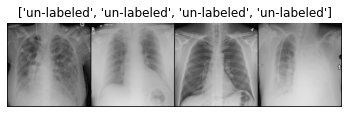

In [0]:
inputs,classes = next(iter(testloader))
class_names = ["un-labeled"]
show_databatch(inputs[:4], classes[:4])

In [0]:
import pandas as pd

In [0]:
def get_label(loader, list_fileName, model, directory):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    df = pd.DataFrame()
    batch_size = loader.batch_size
    with torch.no_grad():
        img_i = 0
        for data in loader:
            images, _ = data
            images = images.to(device)
            outputs = model(images)  
            preds = take_sig(outputs)
            results = preds.cpu().tolist()
            files = list_files[img_i:img_i+batch_size]
            g = pd.DataFrame(results, index=files, columns=[0,1,2])
            if img_i == 0:
                df = g.copy()   
            else:
                df = pd.concat((df,g),axis=0)
            img_i += batch_size
            
    rearanged = df[[0,2,1]]
    
    rearanged.to_csv(directory+"re_results.csv", header=False)
    df.to_csv(directory+"results.csv", header=False)
    print("file saved!")


In [0]:
directory_vggEntire = './gdrive/My Drive/Colab Notebooks/DL/covid_p2/WO_FL/vgg_16/'


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_curves(list_epochs, list_train_val, list_valdation_val, modelName, curveName ):
    plt.plot(list_epochs, list_train_val)
    plt.plot(list_epochs, list_valdation_val)
    plt.title(modelName+ " " + curveName + " "+ " wrt epochs")
    plt.xlabel("epochs")
    plt.ylabel(curveName)
    plt.legend(["training","validation"], loc='best')
    plt.show()

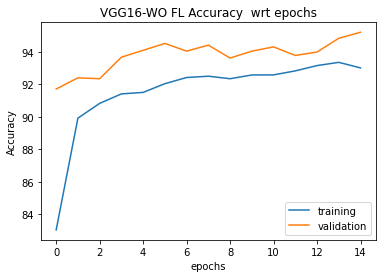

In [0]:

no_epoch_trained = len(acc_loss_dict['t_acc'])
plot_curves(list(range(no_epoch_trained)),  acc_loss_dict['t_acc'], acc_loss_dict['v_acc'], "VGG16-WO FL", "Accuracy" )

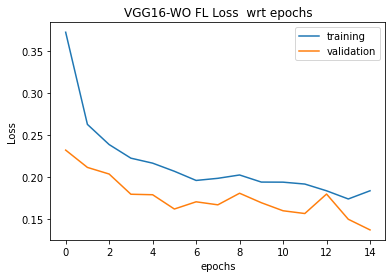

In [0]:
plot_curves(list(range(no_epoch_trained)),  acc_loss_dict['t_loss'], acc_loss_dict['v_loss'], "VGG16-WO FL", "Loss" )

In [0]:
get_label(testloader,list_files, vgg16_Entire, directory_vggEntire)



file saved!


ResNet-18 Without Focal Loss

In [20]:
resnet18_WO = models.resnet18(pretrained=True)
#print(resnet18_Entire)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:

new_features = [nn.Linear(512, 510), nn.ReLU(inplace=True), nn.Dropout(p=0.5, inplace=False), nn.Linear(510, 3) ]
resnet18_WO.fc = nn.Sequential(*new_features)

for param in resnet18_WO.parameters():
    param.requires_grad = True

#for param in resnet18_Entire.parameters():
#    print(param.requires_grad)

In [0]:
## setting directory to continue with saved model
directory_resnetWO = './gdrive/My Drive/Colab Notebooks/DL/covid_p2/WO_FL/resnet_18/'

#with open(directory_resnetEntire+'acc_loss.pkl', 'rb') as obj:
#    acc_loss_dict = pickle.load(obj)

#loading previosuly saved model
#resnet18_Entire.load_state_dict(torch.load(directory_resnetEntire+'resnet18.pth'))


In [0]:
#no_epoch_trained = len(acc_loss_dict['t_acc'])
#plot_curves(list(range(no_epoch_trained)),  acc_loss_dict['t_acc'], acc_loss_dict['v_acc'], "ResNet-18 Entire", "Accuracy" )
#plot_curves(list(range(no_epoch_trained)),  acc_loss_dict['t_loss'], acc_loss_dict['v_loss'], "ResNet-18 Entire", "Loss" )


In [0]:
## training 
resnet18_WO, racc_loss_dict, r_cms = model_training(trainloader, valLoader, resnet18_WO, directory_resnetWO, "Resnet18", 15 ,0.9,0.001, acc_loss_dic=None) 


cuda:0




Per Epoch -> training loss: 0.4258  training Acc:  [94.58065 71.11291 71.72581] Overall accuracy:  79.13979085286458
Per Epoch -> Validation loss: 0.3108  Validation Acc:  [95.541405 86.46497  87.57962 ] Overall accuracy:  89.86199951171875




Per Epoch -> training loss: 0.2756  training Acc:  [96.7742  86.19355 86.35484] Overall accuracy:  89.77419026692708
Per Epoch -> Validation loss: 0.2171  Validation Acc:  [95.541405 90.605095 91.0828  ] Overall accuracy:  92.40976969401042




Per Epoch -> training loss: 0.2392  training Acc:  [96.7742  87.90323 88.06452] Overall accuracy:  90.91398111979167
Per Epoch -> Validation loss: 0.2011  Validation Acc:  [95.541405 91.56052  91.401276] Overall accuracy:  92.8344014485677




Per Epoch -> training loss: 0.2257  training Acc:  [96.7742   88.75807  88.838715] Overall accuracy:  91.45699055989583
Per Epoch -> Validation loss: 0.2389  Validation Acc:  [95.541405 90.28662  90.12739 ] Overall accuracy:  91.98513793945312




Per Epoch -> training loss: 0.2137  training Acc:  [96.7742  89.40323 89.20968] Overall accuracy:  91.7957051595052
Per Epoch -> Validation loss: 0.1875  Validation Acc:  [95.541405 91.71975  92.19746 ] Overall accuracy:  93.15287272135417




Per Epoch -> training loss: 0.2043  training Acc:  [96.7742  90.17742 90.30646] Overall accuracy:  92.4193623860677
Per Epoch -> Validation loss: 0.1735  Validation Acc:  [95.541405 92.8344   93.15287 ] Overall accuracy:  93.84288533528645




Per Epoch -> training loss: 0.1950  training Acc:  [96.7742   90.67742  90.629036] Overall accuracy:  92.6935526529948
Per Epoch -> Validation loss: 0.1604  Validation Acc:  [95.541405 93.78981  93.78981 ] Overall accuracy:  94.37367757161458




Per Epoch -> training loss: 0.1948  training Acc:  [96.7742   90.22581  90.241936] Overall accuracy:  92.41398111979167
Per Epoch -> Validation loss: 0.1602  Validation Acc:  [95.541405 93.94904  94.108284] Overall accuracy:  94.5329081217448




Per Epoch -> training loss: 0.1862  training Acc:  [96.80646  90.838715 90.951614] Overall accuracy:  92.8656005859375
Per Epoch -> Validation loss: 0.1531  Validation Acc:  [95.541405 94.745224 94.745224] Overall accuracy:  95.0106201171875




Per Epoch -> training loss: 0.1852  training Acc:  [96.8871  90.80646 90.80646] Overall accuracy:  92.83333333333333
Per Epoch -> Validation loss: 0.1594  Validation Acc:  [95.541405 93.78981  93.94904 ] Overall accuracy:  94.42674763997395




Per Epoch -> training loss: 0.1805  training Acc:  [97.01613  91.145164 91.29032 ] Overall accuracy:  93.15053304036458
Per Epoch -> Validation loss: 0.1440  Validation Acc:  [96.33758 92.99363 93.15287] Overall accuracy:  94.16135660807292




Per Epoch -> training loss: 0.1802  training Acc:  [97.241936 91.       91.09678 ] Overall accuracy:  93.11290486653645
Per Epoch -> Validation loss: 0.1386  Validation Acc:  [96.65605 94.42675 94.42675] Overall accuracy:  95.1698506673177




Per Epoch -> training loss: 0.1745  training Acc:  [97.3871  91.51613 91.51613] Overall accuracy:  93.47312418619792
Per Epoch -> Validation loss: 0.1662  Validation Acc:  [95.85987 93.3121  93.15287] Overall accuracy:  94.1082763671875




Per Epoch -> training loss: 0.1731  training Acc:  [97.51613  91.69355  91.645164] Overall accuracy:  93.6182861328125
Per Epoch -> Validation loss: 0.1467  Validation Acc:  [97.293  93.3121 93.3121] Overall accuracy:  94.63906860351562




Per Epoch -> training loss: 0.1707  training Acc:  [97.548386 91.79032  91.741936] Overall accuracy:  93.6935526529948
Per Epoch -> Validation loss: 0.1471  Validation Acc:  [98.407646 93.47134  93.15287 ] Overall accuracy:  95.0106201171875
Finished Training


In [0]:
truth = [list(map(int, list_))   for list_ in r_cms['t_true']]
prediction = [list(map(int, list_))   for list_ in r_cms['t_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix for ResNet without focal loss train\n")
train_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(train_cm_sep)



print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 89.34
Hamming Loss 0.0631

Confusion Matrix for ResNet without focal loss train

[[[5989   11]
  [ 141   59]]

 [[1885  315]
  [ 194 3806]]

 [[3803  197]
  [ 315 1885]]]
summary
              precision    recall  f1-score   support

           0       0.84      0.29      0.44       200
           1       0.92      0.95      0.94      4000
           2       0.91      0.86      0.88      2200

   micro avg       0.92      0.90      0.91      6400
   macro avg       0.89      0.70      0.75      6400
weighted avg       0.91      0.90      0.90      6400
 samples avg       0.92      0.91      0.91      6400



In [0]:
truth = [list(map(int, list_))   for list_ in r_cms['v_true']]
prediction = [list(map(int, list_))   for list_ in r_cms['v_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix ResNet without focal loss for Validation\n")
val_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(val_cm_sep)



print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 91.88
Hamming Loss 0.0499

Confusion Matrix ResNet without focal loss for Validation

[[[600   0]
  [ 10  18]]

 [[213  15]
  [ 26 374]]

 [[373  27]
  [ 16 212]]]
summary
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.96      0.94      0.95       400
           2       0.89      0.93      0.91       228

   micro avg       0.93      0.92      0.93       656
   macro avg       0.95      0.84      0.88       656
weighted avg       0.94      0.92      0.93       656
 samples avg       0.93      0.93      0.93       656



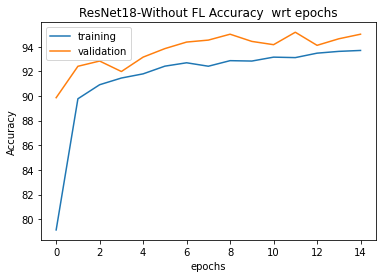

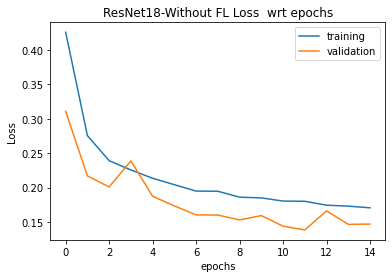

In [0]:
no_epoch_trained = len(racc_loss_dict['t_acc'])
plot_curves(list(range(no_epoch_trained)),  racc_loss_dict['t_acc'], racc_loss_dict['v_acc'], "ResNet18-Without FL", "Accuracy" )
plot_curves(list(range(no_epoch_trained)),  racc_loss_dict['t_loss'], racc_loss_dict['v_loss'], "ResNet18-Without FL", "Loss" )

In [0]:
#directory_resnetWO
get_label(testloader, list_files, resnet18_WO, directory_resnetWO)



file saved!


In [0]:
import torch.nn.functional as F

VGG-16 with Focal Loss

In [0]:
def focal_loss(outputs, targets, alpha=0.25, gamma=2):
    
    probs =  F.sigmoid(outputs)
    ce = F.binary_cross_entropy_with_logits(probs, targets,reduction='none')
    pt = torch.exp(-ce)
    loss = alpha * (1-pt)**gamma * ce

    return loss.mean()


In [0]:
def model_training_fl(trainLoader, valdLoader, model, directory, modelName, Epochs=5, momentum=0.9,lr=0.001, criteria=None, acc_loss_dic=None):


    #if you have gpu then you need to convert the network and data to cuda
    #the easiest way is to first check for device and then convert network and data to device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)


     
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


    model.to(device)
    training_loss = list()
    vald_loss = list()
    training_acc = list()
    vald_acc = list()
    no_epoch_already = 0

    
    if acc_loss_dic != None:
        training_loss = acc_loss_dic['t_loss']
        vald_loss = acc_loss_dic['v_loss']
        training_acc = acc_loss_dic['t_acc']
        vald_acc = acc_loss_dic['v_acc']
        no_epoch_already = len(training_loss)
        print("Model is trained on",no_epoch_already,"epochs already!")


    val_len = len(valdLoader.dataset)
    train_len = len(trainLoader.dataset)
    

    for epoch in range(no_epoch_already, no_epoch_already+Epochs):  # loop over the dataset multiple times
        train_list_trues = list()
        val_list_trues = list()
        train_list_preds = list()
        val_list_preds = list()       
        
        train_loss = 0.0
        train_acc = 0.0
        pbar = tqdm(enumerate(trainloader))
        model.train()

        for i, data in pbar:
            inputs, labels = data
           
            ys = enc.transform(labels.numpy().reshape(-1,1)).toarray()
            for ind,ten in enumerate(labels):
                if ten.item() == 0 :
                    ys[ind] = [1,0,1]
                    
            labels = torch.from_numpy(ys)
            
            inputs, labels = inputs.to(device), labels.to(device) 
            optimizer.zero_grad()

            outputs = model(inputs)               #----> forward pass
            loss = focal_loss(outputs, labels)   #----> compute loss
            loss.backward()                     #----> backward pass
            optimizer.step()                    #----> weights update

            predictions = take_sig(outputs)

            train_list_trues.extend(labels.cpu().tolist())
            train_list_preds.extend(predictions.cpu().tolist())

            train_loss += (loss.item()*inputs.size(0))
            corrects = predictions == labels.data
            train_acc += torch.sum(corrects,0)


            pbar.set_description( 'Train Epoch: {} [{}/{} ({:.0f}%)] \tLoss: {:.6f} '.format(
                    epoch, i * len(inputs), len(trainloader.dataset),  100. * i / len(trainloader),
                    loss.item()))
            
        trnLoss_per_ep = train_loss/train_len
        trnAcc_per_ep = train_acc/train_len
        all_class_acc = (trnAcc_per_ep*100 ).data.cpu().numpy()
        ovl = np.sum(all_class_acc)/3
        print("\nPer Epoch -> training loss: %.4f" % trnLoss_per_ep, " training Acc: ", 
              all_class_acc, "Overall accuracy: ", ovl)
        training_loss.append(trnLoss_per_ep)
        training_acc.append(ovl)


        #PERFORMANCE ON EPOCH
        #FOR Validation DATA-SET
        val_acc = 0.0
        val_loss = 0.0
        
        model.eval()

        for i, data in enumerate(valLoader):
            inputs, targets = data
            ys = enc.transform(targets.numpy().reshape(-1,1)).toarray()
            for ind,ten in enumerate(targets):
                if ten.item() == 0 :
                    ys[ind] = [1,0,1]
            targets = torch.from_numpy(ys)
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)             
            loss = focal_loss(outputs, targets)  
            preds = take_sig(outputs)
            
            val_list_trues.extend(targets.cpu().tolist())
            val_list_preds.extend(preds.cpu().tolist())

            val_loss += (loss.item()*inputs.size(0))
            corrects = preds == targets.data
            val_acc += torch.sum(corrects,0)

        valLoss_per_ep = val_loss/val_len
        valAcc_per_ep = val_acc/val_len
        all_class_acc = (valAcc_per_ep*100 ).data.cpu().numpy()
        ovl = np.sum(all_class_acc)/3
        print("Per Epoch -> Validation loss: %.4f" % valLoss_per_ep, " Validation Acc: ", 
              all_class_acc, "Overall accuracy: ", ovl)
        
        vald_loss.append(valLoss_per_ep)
        vald_acc.append(ovl)
        
        acc_loss = {"t_acc":training_acc, "t_loss":training_loss, "v_acc":vald_acc, "v_loss": vald_loss}
        for_CM =   {"t_true":train_list_trues, "t_pred":train_list_preds, "v_true":val_list_trues, "v_pred": val_list_preds}  
        with open(directory+'acc_loss.pkl', 'wb') as obj:
            pickle.dump(acc_loss,obj)

        with open(directory+'cms.pkl', 'wb') as obj:
            pickle.dump(for_CM,obj)
                
        torch.save(model.state_dict(), directory+modelName+'.pth')

    print('Finished Training')

    return model, acc_loss, for_CM


In [0]:
vgg16_wFL = models.vgg16(pretrained=True)
new_features = [nn.Linear(25088, 510), nn.ReLU(inplace=True), nn.Dropout(p=0.5, inplace=False), nn.Linear(510, 3) ]
vgg16_wFL.classifier = nn.Sequential(*new_features)

for param in vgg16_wFL.parameters():
    param.requires_grad = True
directory_vggwFL = './gdrive/My Drive/Colab Notebooks/DL/covid_p2/W_FL/vgg_16/'



vgg-16 with focal loss

In [31]:
vgg16_wFL, acc_loss_dict_W, f_cms_W = model_training_fl(trainloader, valLoader, vgg16_wFL, directory_vggwFL, "Vgg_16", 15 ,0.9,0.001, None,acc_loss_dic=None) 



cuda:0




Per Epoch -> training loss: 0.0475  training Acc:  [93.85484  39.       63.193554] Overall accuracy:  65.34946695963542
Per Epoch -> Validation loss: 0.0417  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0419  training Acc:  [96.7742   45.629032 64.516136] Overall accuracy:  68.97312418619792
Per Epoch -> Validation loss: 0.0400  Validation Acc:  [95.541405 71.815285 63.694267] Overall accuracy:  77.01698811848958




Per Epoch -> training loss: 0.0407  training Acc:  [96.7742   59.064518 64.516136] Overall accuracy:  73.45161946614583
Per Epoch -> Validation loss: 0.0391  Validation Acc:  [95.541405 83.43949  63.694267] Overall accuracy:  80.8917236328125




Per Epoch -> training loss: 0.0401  training Acc:  [96.7742   65.59678  64.516136] Overall accuracy:  75.62903849283855
Per Epoch -> Validation loss: 0.0386  Validation Acc:  [95.541405 83.598724 63.694267] Overall accuracy:  80.94480387369792




Per Epoch -> training loss: 0.0396  training Acc:  [96.7742   70.532265 64.516136] Overall accuracy:  77.27420043945312
Per Epoch -> Validation loss: 0.0383  Validation Acc:  [95.541405 86.30573  63.694267] Overall accuracy:  81.84713745117188




Per Epoch -> training loss: 0.0393  training Acc:  [96.7742   73.435486 64.516136] Overall accuracy:  78.241943359375
Per Epoch -> Validation loss: 0.0383  Validation Acc:  [95.541405 88.535034 63.694267] Overall accuracy:  82.59024047851562




Per Epoch -> training loss: 0.0388  training Acc:  [96.7742  76.98387 64.66129] Overall accuracy:  79.47312418619792
Per Epoch -> Validation loss: 0.0371  Validation Acc:  [95.541405 85.191086 63.694267] Overall accuracy:  81.4755859375




Per Epoch -> training loss: 0.0378  training Acc:  [96.7742   79.241936 71.25807 ] Overall accuracy:  82.42473856608073
Per Epoch -> Validation loss: 0.0356  Validation Acc:  [95.541405 84.71338  82.80254 ] Overall accuracy:  87.68578084309895




Per Epoch -> training loss: 0.0371  training Acc:  [96.7742   79.19355  78.129036] Overall accuracy:  84.6989237467448
Per Epoch -> Validation loss: 0.0353  Validation Acc:  [95.541405 88.8535   85.828026] Overall accuracy:  90.07431030273438




Per Epoch -> training loss: 0.0368  training Acc:  [96.7742  81.17743 80.33871] Overall accuracy:  86.09678141276042
Per Epoch -> Validation loss: 0.0350  Validation Acc:  [95.541405 85.35033  86.94268 ] Overall accuracy:  89.27813720703125




Per Epoch -> training loss: 0.0363  training Acc:  [96.7742  81.46775 82.7742 ] Overall accuracy:  87.00538126627605
Per Epoch -> Validation loss: 0.0350  Validation Acc:  [95.541405 89.01274  86.94268 ] Overall accuracy:  90.49894205729167




Per Epoch -> training loss: 0.0363  training Acc:  [96.7742  82.61291 82.87097] Overall accuracy:  87.4193623860677
Per Epoch -> Validation loss: 0.0351  Validation Acc:  [95.541405 91.0828   86.1465  ] Overall accuracy:  90.92356363932292




Per Epoch -> training loss: 0.0361  training Acc:  [96.7742  82.7742  84.09678] Overall accuracy:  87.88172403971355
Per Epoch -> Validation loss: 0.0347  Validation Acc:  [95.541405 88.05733  87.73885 ] Overall accuracy:  90.44586181640625




Per Epoch -> training loss: 0.0361  training Acc:  [96.7742   82.91936  84.032265] Overall accuracy:  87.90861002604167
Per Epoch -> Validation loss: 0.0353  Validation Acc:  [95.541405 92.19746  85.35033 ] Overall accuracy:  91.02972412109375




Per Epoch -> training loss: 0.0359  training Acc:  [96.7742  83.24194 84.5    ] Overall accuracy:  88.1720479329427
Per Epoch -> Validation loss: 0.0348  Validation Acc:  [95.541405 90.28662  86.94268 ] Overall accuracy:  90.92357381184895
Finished Training


In [32]:
truth = [list(map(int, list_))   for list_ in f_cms_W['t_true']]
prediction = [list(map(int, list_))   for list_ in f_cms_W['t_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix for VGG with focal loss train\n")
train_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(train_cm_sep)

print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 71.00
Hamming Loss 0.1183

Confusion Matrix for VGG with focal loss train

[[[6000    0]
  [ 200    0]]

 [[1987  213]
  [ 826 3174]]

 [[3921   79]
  [ 882 1318]]]
summary
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.94      0.79      0.86      4000
           2       0.94      0.60      0.73      2200

   micro avg       0.94      0.70      0.80      6400
   macro avg       0.63      0.46      0.53      6400
weighted avg       0.91      0.70      0.79      6400
 samples avg       0.72      0.72      0.72      6400



In [33]:
truth = [list(map(int, list_))   for list_ in f_cms_W['v_true']]
prediction = [list(map(int, list_))   for list_ in f_cms_W['v_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix for Vgg with focal loss Validation\n")
val_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(val_cm_sep)

print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 81.21
Hamming Loss 0.0908

Confusion Matrix for Vgg with focal loss Validation

[[[600   0]
  [ 28   0]]

 [[203  25]
  [ 36 364]]

 [[396   4]
  [ 78 150]]]
summary
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.94      0.91      0.92       400
           2       0.97      0.66      0.79       228

   micro avg       0.95      0.78      0.86       656
   macro avg       0.64      0.52      0.57       656
weighted avg       0.91      0.78      0.84       656
 samples avg       0.82      0.82      0.82       656



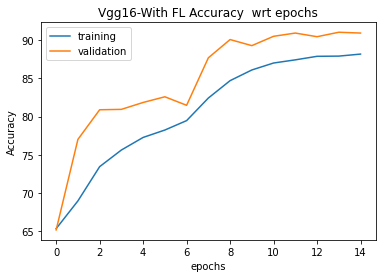

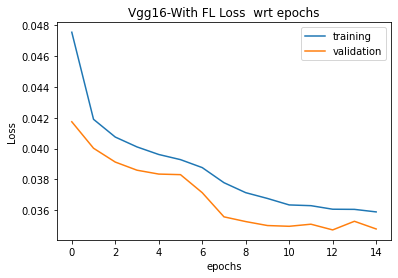

In [36]:
no_epoch_trained = len(acc_loss_dict_W['t_acc'])
plot_curves(list(range(no_epoch_trained)),  acc_loss_dict_W['t_acc'], acc_loss_dict_W['v_acc'], "Vgg16-With FL", "Accuracy" )
plot_curves(list(range(no_epoch_trained)),  acc_loss_dict_W['t_loss'], acc_loss_dict_W['v_loss'], "Vgg16-With FL", "Loss" )

In [37]:
get_label(testloader, list_files, vgg16_wFL, directory_vggwFL)

file saved!


Resnet-18 with focal loss

In [0]:
resnet18_wFL = models.resnet18(pretrained=True)

new_features = [nn.Linear(512, 510), nn.ReLU(inplace=True), nn.Dropout(p=0.5, inplace=False), nn.Linear(510, 3) ]
resnet18_wFL.fc = nn.Sequential(*new_features)

for param in resnet18_wFL.parameters():
    param.requires_grad = True
directory_resnetwFL = './gdrive/My Drive/Colab Notebooks/DL/covid_p2/W_FL/resnet_18/'


In [39]:
resnet18_wFL, racc_loss_dict_W, r_cms_W = model_training_fl(trainloader, valLoader, resnet18_wFL, directory_resnetwFL, "resnet_18", 15 ,0.9,0.001, None,acc_loss_dic=None) 



cuda:0




Per Epoch -> training loss: 0.0537  training Acc:  [91.59678  35.951614 60.33871 ] Overall accuracy:  62.62903340657552
Per Epoch -> Validation loss: 0.0454  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0449  training Acc:  [96.7742   35.564518 64.516136] Overall accuracy:  65.6182861328125
Per Epoch -> Validation loss: 0.0433  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0435  training Acc:  [96.7742   35.53226  64.516136] Overall accuracy:  65.60753377278645
Per Epoch -> Validation loss: 0.0428  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0430  training Acc:  [96.7742   35.758064 64.516136] Overall accuracy:  65.68280029296875
Per Epoch -> Validation loss: 0.0424  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0426  training Acc:  [96.7742   35.790325 64.516136] Overall accuracy:  65.6935526529948
Per Epoch -> Validation loss: 0.0421  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0424  training Acc:  [96.7742   36.20968  64.516136] Overall accuracy:  65.83334350585938
Per Epoch -> Validation loss: 0.0418  Validation Acc:  [95.541405 36.305733 63.694267] Overall accuracy:  65.1804707845052




Per Epoch -> training loss: 0.0421  training Acc:  [96.7742   37.370968 64.516136] Overall accuracy:  66.22043863932292
Per Epoch -> Validation loss: 0.0416  Validation Acc:  [95.541405 36.46497  63.694267] Overall accuracy:  65.23355102539062




Per Epoch -> training loss: 0.0419  training Acc:  [96.7742   39.612904 64.516136] Overall accuracy:  66.96774291992188
Per Epoch -> Validation loss: 0.0413  Validation Acc:  [95.541405 38.057323 63.694267] Overall accuracy:  65.7643330891927




Per Epoch -> training loss: 0.0417  training Acc:  [96.7742   41.016132 64.516136] Overall accuracy:  67.43548583984375
Per Epoch -> Validation loss: 0.0411  Validation Acc:  [95.541405 43.312103 63.694267] Overall accuracy:  67.51593017578125




Per Epoch -> training loss: 0.0415  training Acc:  [96.7742   43.645164 64.516136] Overall accuracy:  68.3118387858073
Per Epoch -> Validation loss: 0.0409  Validation Acc:  [95.541405 52.229298 63.694267] Overall accuracy:  70.48832194010417




Per Epoch -> training loss: 0.0413  training Acc:  [96.7742   47.98387  64.516136] Overall accuracy:  69.75806681315105
Per Epoch -> Validation loss: 0.0407  Validation Acc:  [95.541405 60.350315 63.694267] Overall accuracy:  73.19533284505208




Per Epoch -> training loss: 0.0411  training Acc:  [96.7742   50.       64.516136] Overall accuracy:  70.43011474609375
Per Epoch -> Validation loss: 0.0405  Validation Acc:  [95.541405 65.92357  63.694267] Overall accuracy:  75.05308024088542




Per Epoch -> training loss: 0.0410  training Acc:  [96.7742   53.612907 64.516136] Overall accuracy:  71.63441975911458
Per Epoch -> Validation loss: 0.0403  Validation Acc:  [95.541405 67.35669  63.694267] Overall accuracy:  75.53079223632812




Per Epoch -> training loss: 0.0409  training Acc:  [96.7742   55.887096 64.516136] Overall accuracy:  72.39247639973958
Per Epoch -> Validation loss: 0.0401  Validation Acc:  [95.541405 70.22293  63.694267] Overall accuracy:  76.4862060546875




Per Epoch -> training loss: 0.0407  training Acc:  [96.7742   58.822586 64.516136] Overall accuracy:  73.3709716796875
Per Epoch -> Validation loss: 0.0400  Validation Acc:  [95.541405 74.68153  63.694267] Overall accuracy:  77.97240193684895
Finished Training


In [40]:
truth = [list(map(int, list_))   for list_ in r_cms_W['t_true']]
prediction = [list(map(int, list_))   for list_ in r_cms_W['t_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix for ResNet with focal loss train\n")
train_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(train_cm_sep)



print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 25.23
Hamming Loss 0.2663

Confusion Matrix for ResNet with focal loss train

[[[6000    0]
  [ 200    0]]

 [[2083  117]
  [2436 1564]]

 [[4000    0]
  [2200    0]]]
summary
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.93      0.39      0.55      4000
           2       0.00      0.00      0.00      2200

   micro avg       0.93      0.24      0.39      6400
   macro avg       0.31      0.13      0.18      6400
weighted avg       0.58      0.24      0.34      6400
 samples avg       0.25      0.25      0.25      6400



In [41]:
truth = [list(map(int, list_))   for list_ in r_cms_W['v_true']]
prediction = [list(map(int, list_))   for list_ in r_cms_W['v_pred']]

print("Accuracy %.2f" %(accuracy_score(truth,prediction)*100))
print("Hamming Loss %.4f" %(hamming_loss(truth,prediction)))

print("\nConfusion Matrix for ResNet with focal loss Validation\n")
val_cm_sep = multilabel_confusion_matrix(truth, prediction)
print(val_cm_sep)

print("summary")
summary = classification_report(truth, prediction)
print(summary)


Accuracy 41.08
Hamming Loss 0.2203

Confusion Matrix for ResNet with focal loss Validation

[[[600   0]
  [ 28   0]]

 [[211  17]
  [142 258]]

 [[400   0]
  [228   0]]]
summary
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.94      0.65      0.76       400
           2       0.00      0.00      0.00       228

   micro avg       0.94      0.39      0.55       656
   macro avg       0.31      0.21      0.25       656
weighted avg       0.57      0.39      0.47       656
 samples avg       0.41      0.41      0.41       656



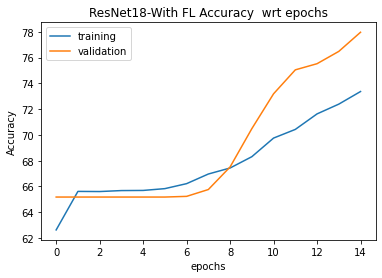

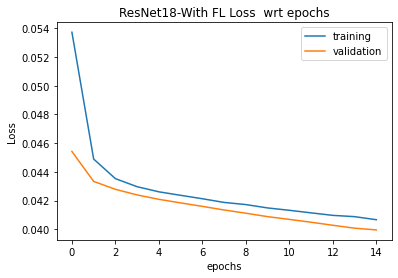

In [42]:
no_epoch_trained = len(racc_loss_dict_W['t_acc'])
plot_curves(list(range(no_epoch_trained)),  racc_loss_dict_W['t_acc'], racc_loss_dict_W['v_acc'], "ResNet18-With FL", "Accuracy" )
plot_curves(list(range(no_epoch_trained)),  racc_loss_dict_W['t_loss'], racc_loss_dict_W['v_loss'], "ResNet18-With FL", "Loss" )

In [43]:
get_label(testloader, list_files, resnet18_wFL, directory_resnetwFL)

file saved!
